# Desafio

Neste desafio vamos trabalhar com duas bases de dados da classe de ativos Fundos Imobiliários (FIIs). Primeiro, obtenha os dados atualizados de FIIs no
site <https://statusinvest.com.br> (FII > Busca Avançada > Buscar > Download). Depois, obtenha os preços diários do fundo imobiliário de shopping VISC11
no período de 01/01/2022 até 12/03/2023 pelo site <https://br.investing.com/> (Histórico). Faça o tratamento de dados inicialmente pelo Excel (CSV para XLSX, conversão tipo geral para numérico etc.) nas duas bases. Salve os arquivos de dados Bruto (CSV) e os de dados Limpos (XLSX) em suas respectivas pastas conforme orientação em aulas passadas. Depois crie um programa em Python através do Google Colab, capaz de ler, manipular e construir gráficos dos dados conforme descritos nas atividades abaixo.

## Atividades

Os alunos deverão desempenhar as seguintes atividades:

1. Faça uma análise exploratório desta base de dados dos FIIs.(ok)
2. Crie um gráfico de dispersão com o nome dos ativos no eixo X e os preços no eixo Y no tamanho 12 x 8.(ok)
3. Calcule o percentil de 95 dos dados.(ok)
4. Crie uma reta no gráfico com o valor encontrado cortando o eixo Y.(ok)
5. Exclua os preços igual a zero e exclua os valores acima do percentil calculado anteriormente.(ok)
6. Salve esse dataframe em um novo Excel.(ok)
7. Refaça o gráfico de dispersão com o novo Excel. (ok)
8. Como ainda existem valores muito altos, limite o eixo Y com valores de 0 até R$ 200,00 e crie novamente o gráfico. (ok)
9. Agora crie um gráfico de dispersão com os valores de P/VP. (ok)
10. Exclua os valores menores que o percentil 5 e os maiores que o percentil 95. (ok)
11. Crie um gráfico com os valores mantidos no passo anterior e trace uma linha no eixo Y com o valor igual a 1 (P/VP = 1 Valor Justo de um FII). (ok)
12. Reflita sobre este gráfico: Estamos em um bom momento para adquirir ou indicar FIIs? (ok)
13. Agora vamos trabalhar com médias móveis e análise técnica em cima de um dos FIIs (VISC11 – Fundo Imobiliário de Shopping).
14. Crie um gráfico com a base de dados baixada do site investing.com (cotação de preço de VISC11) e inclua neste gráfico as médias móveis dos seguintes períodos (MA14, MA60 e MA120).
15. Reflita sobre este gráfico: Está fácil de estimar a tendência deste ativo?
16. Agora vamos trabalhar com o salvamento do gráfico anterior em formato PDF e salvar este arquivo em um Bucket do GCP (Google Cloud Plataform).

## Importação das libs

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf

pd.plotting.register_matplotlib_converters()
#%matplotlib inline


## Execução das atividades

### 1. Análise exploratória dos FIIs

In [65]:
fiis_df = pd.read_excel('01-dados-limpos/fundos_imob.xlsx')

fiis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  432 non-null    object 
 1   PRECO                   432 non-null    float64
 2   ULTIMO DIVIDENDO        432 non-null    float64
 3   DY                      432 non-null    float64
 4   VALOR PATRIMONIAL COTA  432 non-null    float64
 5   P/VP                    432 non-null    float64
 6   LIQUIDEZ MEDIA DIARIA   432 non-null    float64
 7   PERCENTUAL EM CAIXA     432 non-null    float64
 8   CAGR DIVIDENDOS 3 ANOS  432 non-null    float64
 9   CAGR VALOR CORA 3 ANOS  432 non-null    float64
 10  PATRIMONIO              432 non-null    float64
 11  N COTISTAS              432 non-null    int64  
 12  GESTAO                  432 non-null    object 
 13  N COTAS                 432 non-null    int64  
dtypes: float64(10), int64(2), object(2)
memory

In [66]:
fiis_df.describe()

,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,N COTAS
count,432.000000,432.000000,432.000000,432.000000,432.000000,4.320000e+02,432.000000,432.000000,432.000000,4.320000e+02,432.000000,4.320000e+02
mean,591.289398,10.877070,14.768495,586.660069,5.602986,5.065253e+05,15.795926,7.553495,5.238495,4.282442e+08,23306.152778,7.240578e+06
std,5921.692562,171.444227,86.504521,4182.425207,94.415205,1.179084e+06,123.637873,17.257502,10.730292,7.841621e+08,63721.337485,1.757517e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,12.255000,0.179854,0.000000,76.460000,0.530000,1.981250e+02,1.197500,0.000000,0.000000,6.287938e+07,69.000000,5.189560e+05
50%,76.235000,0.700000,9.405000,97.710000,0.820000,3.515228e+04,2.425000,0.000000,0.000000,1.506372e+08,1540.000000,1.685606e+06
75%,100.000000,1.050000,13.500000,121.245000,0.940000,3.708373e+05,6.387500,9.347500,6.235000,3.915602e+08,11569.250000,5.621504e+06
max,94794.810000,3559.270493,1615.080000,64104.840000,1961.670000,9.847125e+06,2489.440000,142.930000,68.350000,7.561313e+09,792703.000000,2.260397e+08


In [67]:
fiis_df['GESTAO'].value_counts()

Ativa      342
Passiva     84
--           6
Name: GESTAO, dtype: int64

In [68]:
fiis_df[fiis_df['GESTAO'] == '--']

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
81,MCHY11,110.00,1.400000,17.09,99.82,1.10,20710.84,9.86,0.00,0.00,3.583473e+08,632,--,3589771
95,RBRI11,999.89,35.620000,0.00,1213.20,0.82,98989.00,0.02,0.00,0.00,1.602482e+08,84,--,132087
203,MGHT11,60.13,0.800000,14.97,84.89,0.71,95114.00,6.96,10.65,0.00,1.115335e+08,3011,--,1313784
319,APXM11,0.00,0.000000,0.00,100.12,0.00,0.00,100.17,0.00,0.00,1.802217e+07,39,--,180010
338,RBVO11,9.19,0.020000,3.13,17.19,0.53,1477.18,5.95,36.74,25.24,8.867875e+06,2750,--,515824
414,RBRM11,94794.81,3559.270493,48.58,46981.16,2.02,0.00,10.40,0.00,0.00,2.532285e+07,54,--,539


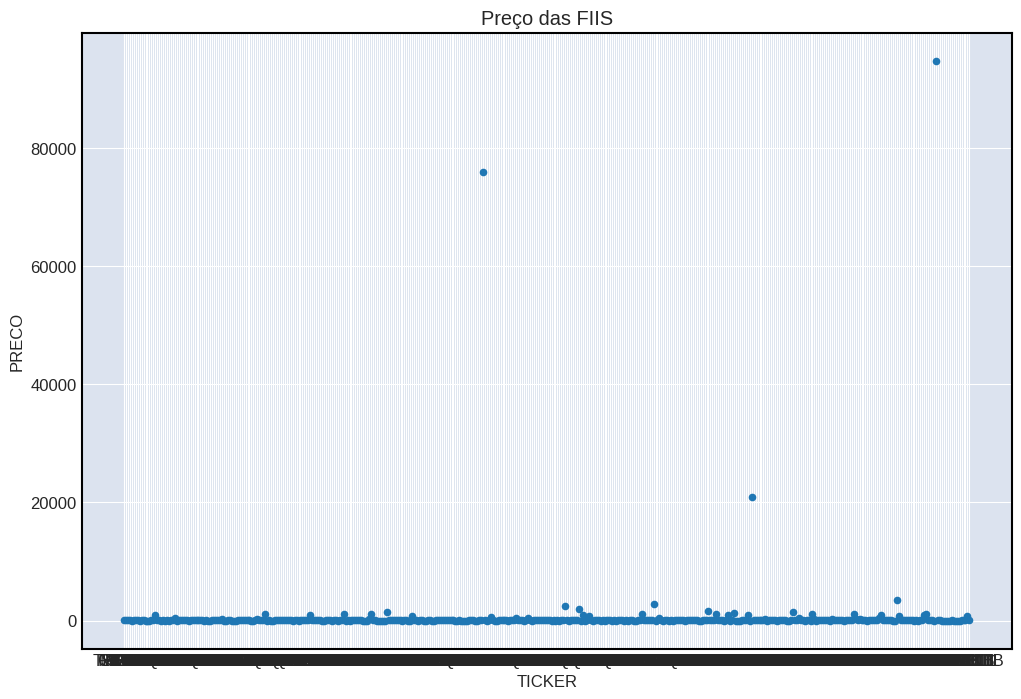

In [69]:
ax = fiis_df.plot(x='TICKER', y='PRECO', kind='scatter', figsize=(12,8))
ax.set_title('Preço das FIIS')

plt.show()

In [70]:
P95 = np.percentile(fiis_df.PRECO, 95)

P95

989.1109999999998

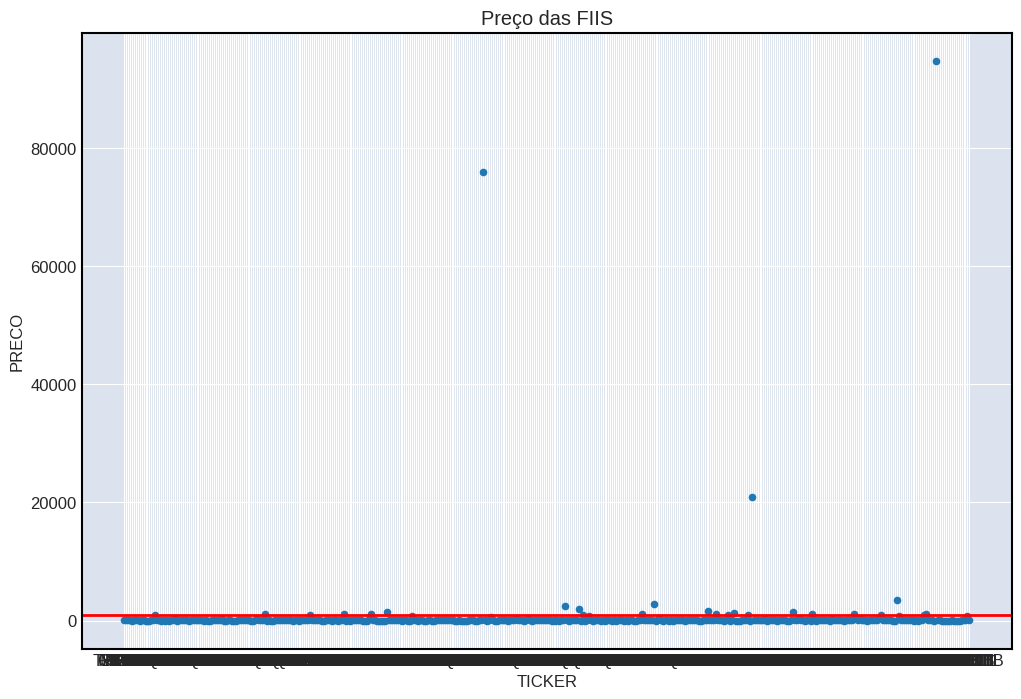

In [71]:
ax = fiis_df.plot(x='TICKER', y='PRECO', kind='scatter', figsize=(12,8))
ax.set_title('Preço das FIIS')
ax.axhline(y=P95, color='r')

plt.show()

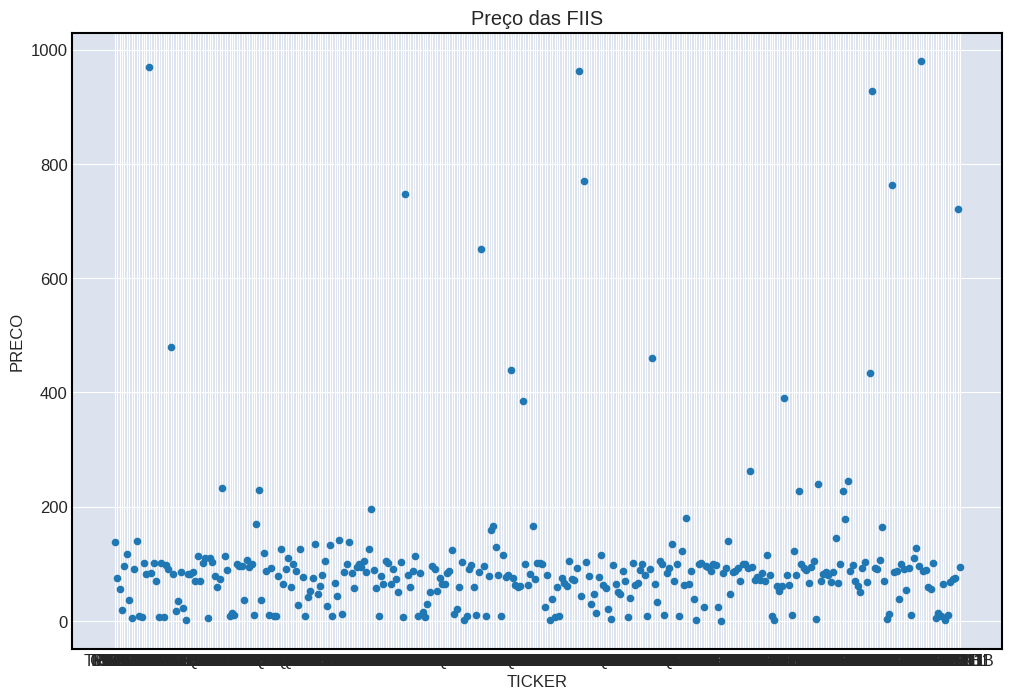

In [72]:
fiis_df.drop(fiis_df[(fiis_df['PRECO'] == 0) | (fiis_df['PRECO'] > P95)].index, inplace=True)

fiis_df.to_excel('02-output/fundos_imob_sem_outliers.xlsx')

ax = fiis_df.plot(x='TICKER', y='PRECO', kind='scatter', figsize=(12,8))
ax.set_title('Preço das FIIS')

plt.show()

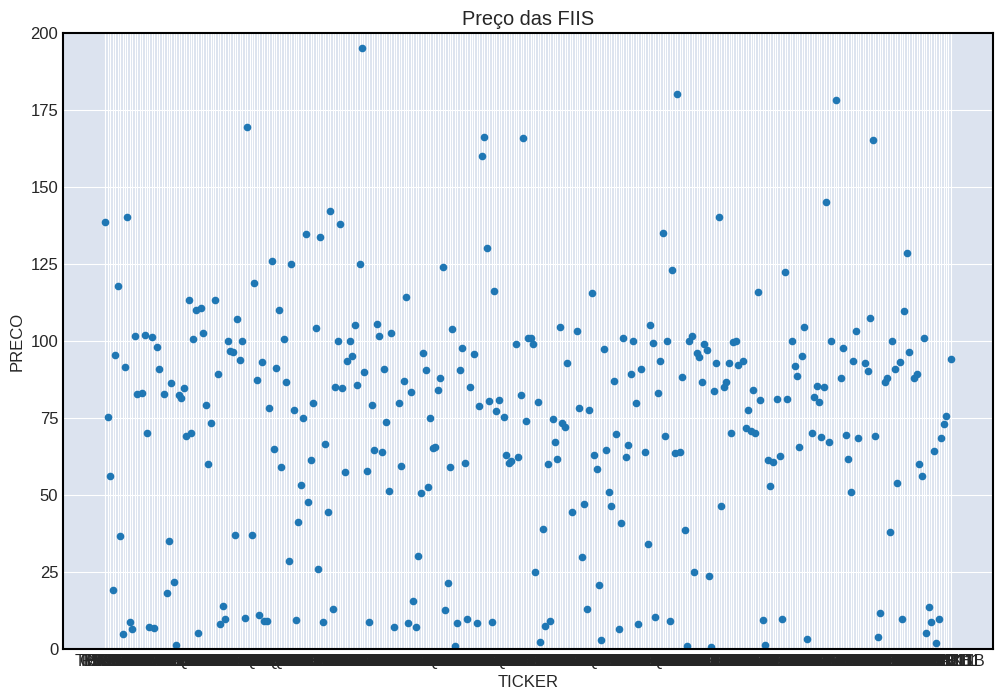

In [73]:
ax = fiis_df.plot(x='TICKER', y='PRECO', kind='scatter', figsize=(12,8))
ax.set_title('Preço das FIIS')
ax.set_ylim([0, 200])

plt.show()

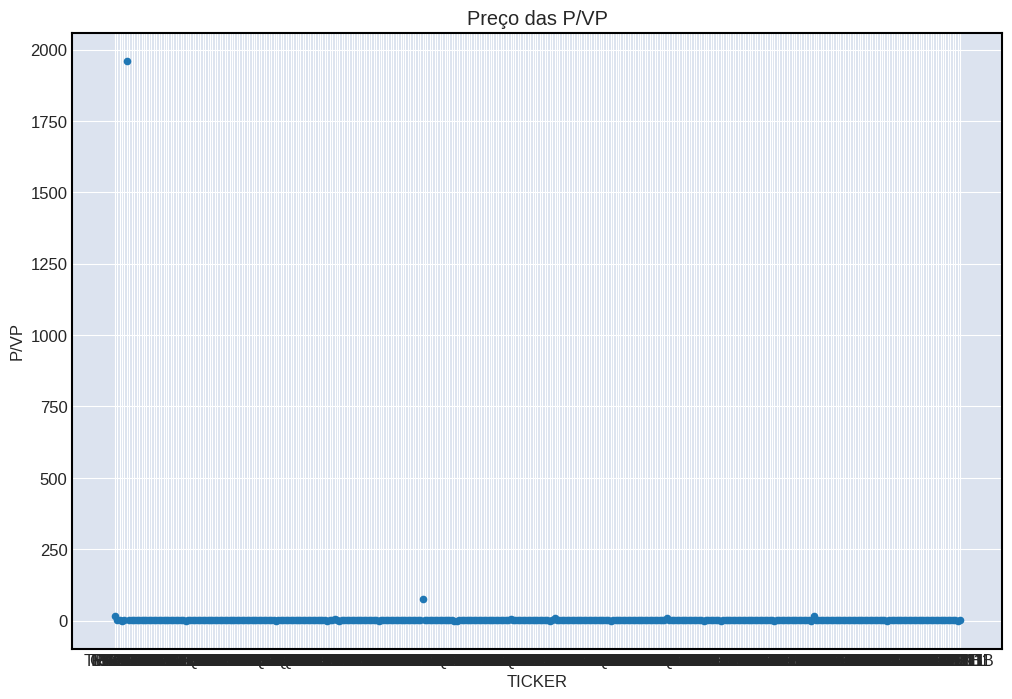

In [74]:
ax = fiis_df.plot(x='TICKER', y='P/VP', kind='scatter', figsize=(12,8))
ax.set_title('Preço das P/VP')

plt.show()

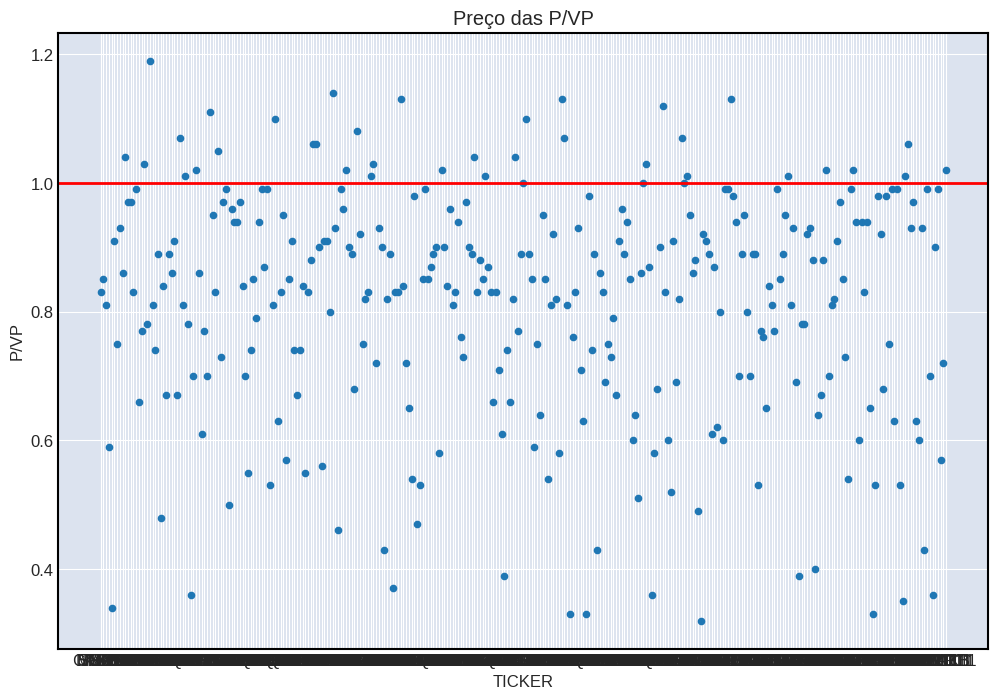

In [75]:
# Removendo os valores menores que o 5 percentil e maior que o 95 percentil de P/VP
fiis_df.drop(fiis_df[(fiis_df['P/VP'] < np.percentile(fiis_df['P/VP'], 5)) | (fiis_df['P/VP'] > np.percentile(fiis_df['P/VP'], 95))].index, inplace=True)

ax = fiis_df.plot(x='TICKER', y='P/VP', kind='scatter', figsize=(12,8))
ax.set_title('P/VP')
ax.axhline(y=1, color='r')

plt.show()

### 2. Estamos em um bom momento para adquirir ou indicar FIIs?

Olhando o gráfico podemos verificar que as FIIs estão bem descontadas pagando, com um grande potencial de ganho.

### 3. Análise técnica em cima de um dos FIIs

Carregando a base do FII

In [76]:
cotacoes_visc11 = pd.read_excel('01-dados-limpos/VISC11-230101-230312.xlsx')

cotacoes_visc11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      298 non-null    datetime64[ns]
 1   Ultimo    298 non-null    float64       
 2   Abertura  298 non-null    float64       
 3   Maxima    298 non-null    float64       
 4   Minima    298 non-null    float64       
 5   Vol.(K)   298 non-null    float64       
 6   Var%      298 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.4 KB


In [77]:
cotacoes_visc11.drop('Var%', axis=1, inplace=True)

cotacoes_visc11.rename(columns={'Vol.(K)':'Volume'}, inplace=True)
cotacoes_visc11['Volume'] = cotacoes_visc11['Volume'] * 1000

cotacoes_visc11.set_index('Data',inplace=True)
cotacoes_visc11.sort_index(inplace=True)

cotacoes_visc11 = cotacoes_visc11[['Abertura','Maxima', 'Minima', 'Ultimo', 'Volume']]
cotacoes_visc11.columns = ['Open', 'High', 'Low', 'Close','Volume']

cotacoes_visc11['MA14'] = cotacoes_visc11['Close'].rolling(window=14).mean()
cotacoes_visc11['MA60'] = cotacoes_visc11['Close'].rolling(window=60).mean()
cotacoes_visc11['MA120'] = cotacoes_visc11['Close'].rolling(window=120).mean()

cotacoes_visc11.head()

,Open,High,Low,Close,Volume,MA14,MA60,MA120
Data,,,,,,,,
2022-01-03,103.00,103.44,101.39,101.70,18140.0,NaN,NaN,NaN
2022-01-04,102.11,103.26,101.50,101.96,20320.0,NaN,NaN,NaN
2022-01-05,101.96,102.49,101.16,101.16,14370.0,NaN,NaN,NaN
2022-01-06,101.16,102.40,100.55,102.11,20340.0,NaN,NaN,NaN
2022-01-07,102.11,103.00,101.10,101.70,20280.0,NaN,NaN,NaN


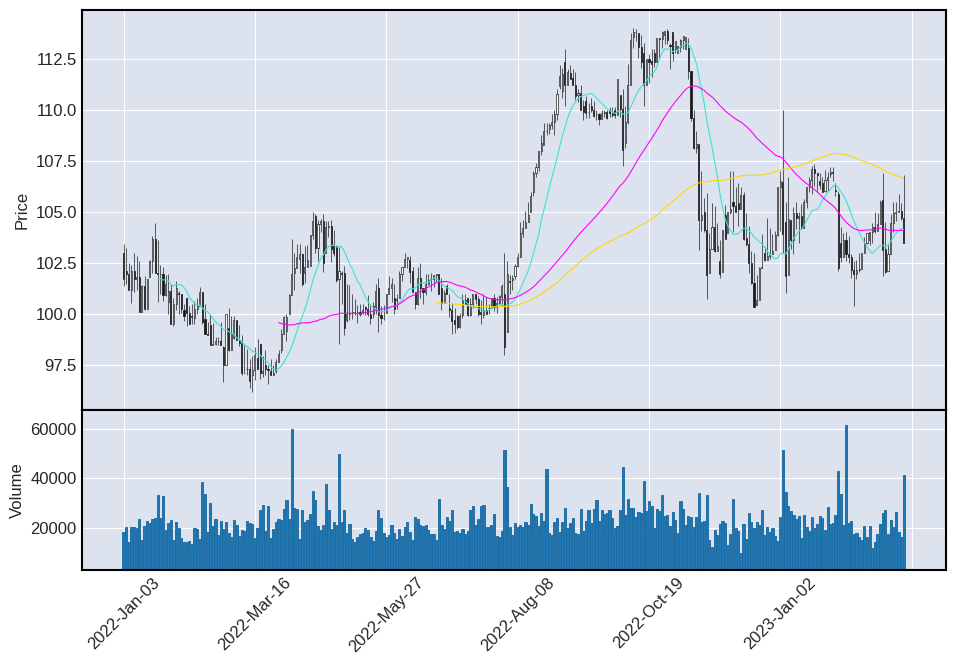

In [78]:
mpf.plot(cotacoes_visc11, type='candle', mav=[14,60,120], volume=True, figsize=(12,8))